In [3]:
import xml.etree.ElementTree as ET 
import numpy as np
import matplotlib.pyplot as plt

import errors
import extract_observables
from plotting_envir import Plotter

In [4]:
data_path = "/home/lqcd/brian137/chroma_Wloops/gpu_test/wflow_to_1.5/data/"
smoothing = [0, 0.5, 1, 1.5]

#with off axis
start_time = [7,10,12,13]
breakpts = [0, 9, 18, 29, 40]

#with only on axis
#start_time = [8, 11, 12, 12]
#breakpts = [0, 3, 7, 11, 14]

data = extract_observables.Data_Processing(data_path, start_time = [7,10,12,13])
data.file1 = 3550
data.off_axis = True
#data.off_axis = False
data.read_all_files()



In [5]:
potential = data.find_potential_errors()
force = data.find_force_errors()

In [6]:
potential.shape

(4, 2, 70)

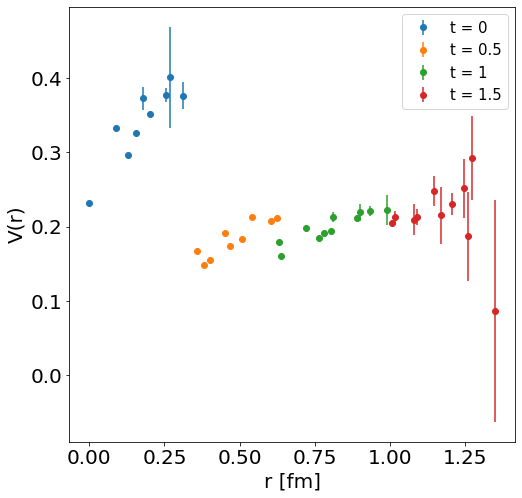

In [7]:
plotter = Plotter(f"", "r [fm]", "V(r)"); ax = plotter.ax
for i in range(0, 4):
    ax.errorbar(data.r[breakpts[i]:breakpts[i+1]]*0.09, 
                potential[i][0][breakpts[i]:breakpts[i+1]], 
                yerr = potential[i][1][breakpts[i]:breakpts[i+1]], 
                fmt = "o", label = f"t = {smoothing[i]}")

plotter.show_legend()

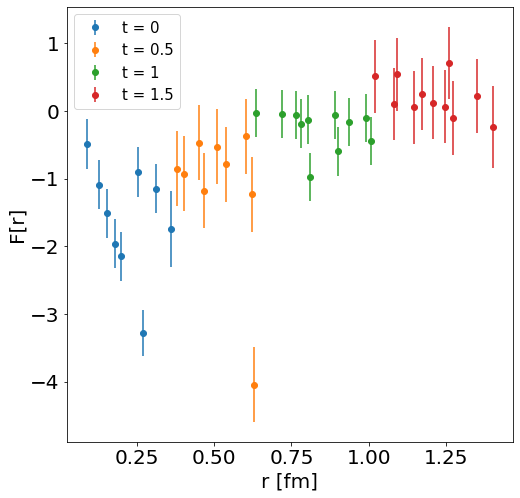

In [8]:
plotter = Plotter(f"", "r [fm]", "F[r]"); ax = plotter.ax

for i in range(0,4):
    dr = data.r[1:] - data.r[:-1]
    r = data.r[1:][breakpts[i]:breakpts[i+1]]
    ax.errorbar(r*0.09, 
                 (force[i][0]/dr)[breakpts[i]:breakpts[i+1]], 
                 yerr = (force[i][1])[breakpts[i]:breakpts[i+1]], 
                 fmt = 'o', label = f"t = {smoothing[i]}")

plotter.show_legend()